In [130]:
from sklearn.impute import KNNImputer
from Data_binary import *
import numpy as np

In [131]:
# read in the training/test sets
env = Data(unknown_rate=1)
env.loadfile_noshuffle("../MDP/csv_files/partitioned_data/survey_training.csv")
#m=1000
training_data = np.array([env.data[i][1] for i in range(m) ])

test_env = Data(unknown_rate=1)
use = len(test_env.data)
test_env.loadfile_noshuffle("../MDP/csv_files/partitioned_data/survey_test.csv")
test_data = np.array([test_env.data[i][1] for i in range(use) ])

num_features = len(test_data[0])

costs = read_costs("../MDP/csv_files/partitioned_data/survey_cost.csv")

print(training_data.shape)

(1000, 31)


In [132]:
full = np.nan * np.ones((len(training_data) + use, num_features ))


# populate the training set portion of the matrix
for i in range(len(training_data)):
    full[i] = np.array(training_data[i])
    
for i in range(use):
    full[i+len(training_data)] = np.array(test_data[i])

In [133]:
# let's impute using KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
partial = np.nan * np.ones((len(training_data) + use, num_features ))
for j in range(len(training_data)):
    partial[j] = np.array(training_data[j])

imputed_partial = imputer.fit_transform(partial)
print(np.linalg.norm(imputed_partial-full))

6.8554798336805


In [134]:
def load_steps(fname):
    f = open(fname,'r')
    f = open(fname, 'r')
    lines = f.readlines()
    steps_table = []
    for l in lines:
        s = l.split(',')
        steps = []
        for ss in s:
            steps.append(int(ss))
        steps_table.append(steps)
    return steps_table

In [135]:
m = len(training_data)
N = 10
res1 = []

for i in range(N):
    partial = np.nan * np.ones((len(training_data) + use, num_features ))
    for j in range(len(training_data)):
        partial[j] = np.array(training_data[j])
    
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/survey_tree" + str(i+1) + ".csv")
    
    # update the steps
    for s in range(use):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            partial[m+s][cur_update] = test_data[s][cur_update]
        
    
    imputed_partial = imputer.fit_transform(partial)
        
    print(np.linalg.norm(imputed_partial-full))
    res1.append(np.linalg.norm(imputed_partial-full))

at budget: 0.1
1.8103866990231672
at budget: 0.2
0.9772410142846032
at budget: 0.3
0.722841614740048
at budget: 0.4
0.744983221287567
at budget: 0.5
0.6763874629234341
at budget: 0.6
0.5787918451395112
at budget: 0.7
0.47958315233127186
at budget: 0.8
0.29154759474226494
at budget: 0.9
0.19999999999999996
at budget: 1.0
0.0


In [136]:
m = len(training_data)
N = 10

res2 = []

for i in range(N):
    partial = np.nan * np.ones((len(training_data) + use, num_features ))
    for j in range(len(training_data)):
        partial[j] = np.array(training_data[j])
    
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/survey_rand" + str(i+1) + ".csv")
    
    # update the steps
    for s in range(use):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            partial[m+s][cur_update] = test_data[s][cur_update]
        
    
    imputed_partial = imputer.fit_transform(partial)
        
    print(np.linalg.norm(imputed_partial-full))
    res2.append(np.linalg.norm(imputed_partial-full))

at budget: 0.1
2.2901964981197573
at budget: 0.2
2.2561028345356955
at budget: 0.3
2.380651171423483
at budget: 0.4
1.6575584454250776
at budget: 0.5
1.5419143945109275
at budget: 0.6
1.35
at budget: 0.7
0.916515138991168
at budget: 0.8
0.7599342076785333
at budget: 0.9
0.873212459828649
at budget: 1.0
0.0


In [137]:
m = len(training_data)
N = 10

res3 = []

for i in range(N):
    partial = np.nan * np.ones((len(training_data) + use, num_features ))
    for j in range(len(training_data)):
        partial[j] = np.array(training_data[j])
    
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/survey" + str(float(i+1)) + ".csv")
    
    # update the steps
    for s in range(use):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            if cur_update < num_features:
                partial[m+s][cur_update] = test_data[s][cur_update]
        
    
    imputed_partial = imputer.fit_transform(partial)
        
    print(np.linalg.norm(imputed_partial-full))
    res3.append(np.linalg.norm(imputed_partial-full))

at budget: 0.1
2.8500000000000005
at budget: 0.2
2.699073915253156
at budget: 0.3
1.675559608011604
at budget: 0.4
2.0934421415458324
at budget: 0.5
1.6255768207008858
at budget: 0.6
1.3360389215887387
at budget: 0.7
1.2186057606953942
at budget: 0.8
1.0793516572461452
at budget: 0.9
0.19999999999999996
at budget: 1.0
0.0


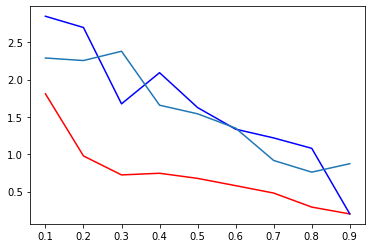

In [139]:
import matplotlib.pyplot as plt

budgets = [(i+1)/N for i in range(N-1)]
plt.plot(budgets, res1[:N-1], 'r', budgets, res3[:N-1], 'b', budgets, res2[:N-1])
plt.show()

In [152]:
import alipy as al
partial = np.nan * np.ones((len(training_data) + use, num_features ))
mask = np.zeros((len(training_data) + use, num_features) )
y = np.ones(len(training_data) + use)
train_idx = [i for i in range(len(training_data)+use)]
for j in range(len(training_data)):
    partial[j] = np.array(training_data[j])
    mask[j] = np.ones((1,num_features))

print(mask.shape)

query = alipy.query_strategy.QueryFeatureAFASMC(full,y,train_idx)

(1010, 31)


In [153]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=0)
imp.fit(training_data)

test_partial = np.nan * np.ones((use, num_features ))

imputed_partial = imp.transform(test_partial)
print(imputed_partial)
print(np.linalg.norm(test_data - imputed_partial))

print(np.min(mask))

[[0.0985  0.414   0.44825 0.49225 0.52675 0.54725 0.532   0.5305  0.5285
  0.51875 0.51825 0.548   0.53025 0.552   0.513   0.56075 0.57325 0.5715
  0.54175 0.59775 0.5505  0.56725 0.57125 0.57875 0.57575 0.55375 0.5435
  0.57275 0.5545  0.54425 0.575  ]
 [0.0985  0.414   0.44825 0.49225 0.52675 0.54725 0.532   0.5305  0.5285
  0.51875 0.51825 0.548   0.53025 0.552   0.513   0.56075 0.57325 0.5715
  0.54175 0.59775 0.5505  0.56725 0.57125 0.57875 0.57575 0.55375 0.5435
  0.57275 0.5545  0.54425 0.575  ]
 [0.0985  0.414   0.44825 0.49225 0.52675 0.54725 0.532   0.5305  0.5285
  0.51875 0.51825 0.548   0.53025 0.552   0.513   0.56075 0.57325 0.5715
  0.54175 0.59775 0.5505  0.56725 0.57125 0.57875 0.57575 0.55375 0.5435
  0.57275 0.5545  0.54425 0.575  ]
 [0.0985  0.414   0.44825 0.49225 0.52675 0.54725 0.532   0.5305  0.5285
  0.51875 0.51825 0.548   0.53025 0.552   0.513   0.56075 0.57325 0.5715
  0.54175 0.59775 0.5505  0.56725 0.57125 0.57875 0.57575 0.55375 0.5435
  0.57275 0.5545  0

In [154]:
import copy
N = 10
budgets = [(i+1)/N for i in range(N)]
res_active = []

all_full = copy.copy(full)

for c in budgets:
    print("current budget:", c)
    used = np.zeros((use))
    test_partial = np.nan * np.ones((use, num_features ))
    query = alipy.query_strategy.QueryFeatureAFASMC(all_full,y,train_idx)
    mask = np.zeros((len(training_data) + use,num_features) )
    for j in range(len(training_data)):
        mask[j] = np.ones((1,num_features))
    full = copy.copy(all_full)
    
    prev = -1
    while(np.min(mask) == 0):
        sel = query.select_by_mask(mask)[0]
        if (sel[0] != prev):
            print("at", sel[0]-m)
            prev = sel[0]
        
        # see if selected value can be updated
        if costs[sel[1]] + used[sel[0]-m] <= c:
            mask[sel[0],sel[1]] = 1
            test_partial[sel[0]-m, sel[1]] = test_data[sel[0]-m,sel[1]]
            used[sel[0]-m] += costs[sel[1]]
        else:
            # we cannot update this tuple anymore;
            # set the whole tuple to be the imputed values
            # set all the features as known
            
            for f in range(num_features):
                if mask[sel[0],f] == 0 and used[sel[0]-m] + costs[sel[1]] <= c:
                    mask[sel[0], f] = 1
                    used[sel[0]-m] + costs[sel[1]]
                    test_partial[sel[0]-m, sel[1]] = test_data[sel[0]-m,sel[1]]
                
            imputed_partial = imp.transform(test_partial)
            full[sel[0]] = imputed_partial[sel[0]-m]
            mask[sel[0]] = np.ones((num_features))
            
    imputed_partial = imp.transform(test_partial)
    print(np.linalg.norm(test_data - imputed_partial))
    res_active.append(np.linalg.norm(test_data - imputed_partial))

current budget: 0.1
at 0
at 9
at 1
at 2
at 3
at 4
at 5
at 6
at 7
at 8
at 6
at 2
6.111717651602617
current budget: 0.2
at 0
at 9
at 1
at 2
at 3
at 4
at 5
at 6
at 7
at 8
at 6
at 2
5.3544932688643385
current budget: 0.3
at 0
at 9
at 1
at 2
at 3
at 4
at 2
at 5
at 6
at 7
at 6
at 8
at 6
at 2
at 6
at 2
4.714089674425731
current budget: 0.4
at 0
at 9
at 1
at 2
at 3


KeyboardInterrupt: 

In [129]:
print(res_active)

[17.738909312121343]
